In [1]:
import pandas as pd
import seaborn as sns
from sklearn import linear_model, model_selection
from sklearn.metrics import confusion_matrix

In [2]:
path = 'athletes_sochi.txt'

In [3]:
df = pd.read_csv(path)
df.head()

,age,birthdate,gender,height,name,weight,gold_medals,silver_medals,bronze_medals,total_medals,sport,country
0,17,1996-04-12,Male,1.72,Aaron Blunck,68.0,0,0,0,0,Freestyle Skiing,United States
1,27,1986-05-14,Male,1.85,Aaron March,85.0,0,0,0,0,Snowboard,Italy
2,21,1992-06-30,Male,1.78,Abzal Azhgaliyev,68.0,0,0,0,0,Short Track,Kazakhstan
3,21,1992-05-25,Male,1.68,Abzal Rakimgaliev,NaN,0,0,0,0,Figure Skating,Kazakhstan
4,21,1992-07-30,Male,1.86,Adam Barwood,82.0,0,0,0,0,Alpine Skiing,New Zealand


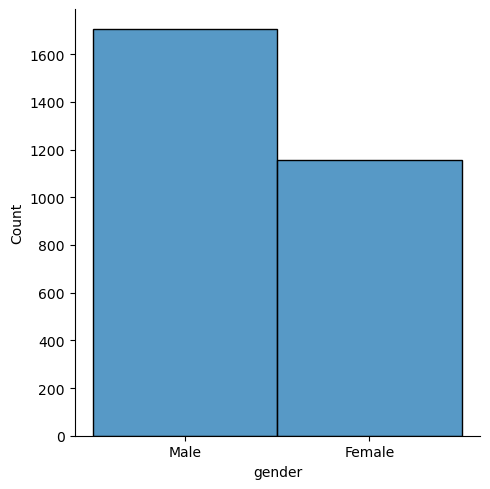

In [4]:
sns.displot(df, x='gender')

In [5]:
df = df.dropna()
df = df.sample(frac=1)

In [6]:
df["BMI"] = round(df["weight"] / (df["height"]**2), 2)
input_data = df[['weight', 'height', 'BMI']]
output_data = df['gender']
output_data = output_data.apply(lambda x: int(x == 'Male'))  #заменяем Male на 1, fEMALE на 0

In [7]:
def predict_sex(input_data, output_data):
    X_train, X_test, Y_train, Y_test = model_selection.train_test_split(input_data, output_data, test_size=0.2)
    
    model = linear_model.LogisticRegression()
    model.fit(X_train, Y_train)
    
    predict = model.predict(X_test)
    [tn, fp], [fn, tp] = confusion_matrix(Y_test, predict)
    
    print(f'Accuracy: {(tn + tp) / (tp + fp + tn + fn)}')
    return model

In [8]:
model_1 = predict_sex(input_data, output_data)

Accuracy: 0.8709677419354839


In [9]:
#попробуем добавить столбец age в фичи
input_data_2 = df[['age', 'weight', 'height', 'BMI']]

In [10]:
model_2 = predict_sex(input_data_2, output_data)

Accuracy: 0.8770161290322581


In [11]:
sns.relplot(x='height', y='weight', hue='gender', data=df)

In [12]:
df_cut = df[['age', 'weight', 'height', 'BMI', 'gender']]
sns.pairplot(df_cut, hue='gender')